In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
rita = pd.read_csv(r"C:\Users\user\Downloads\rita.csv")

In [6]:
rita.shape

(607, 12)

In [7]:
rita.info

<bound method DataFrame.info of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD        

In [13]:
rita.describe(include='all')

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [14]:
rita.value_counts()

Unnamed: 0  work_year  experience_level  employment_type  job_title                  salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  company_location  company_size
0           2020       MI                FT               Data Scientist             70000   EUR              79833          DE                  0             DE                L               1
399         2022       SE                FT               Data Scientist             158200  USD              158200         US                  100           US                L               1
401         2022       SE                FT               Data Engineer              154600  USD              154600         US                  100           US                L               1
402         2022       SE                FT               Data Analyst               115934  USD              115934         US                  0             US                M               1
403         2022       SE     

In [15]:
pd.DataFrame(rita)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


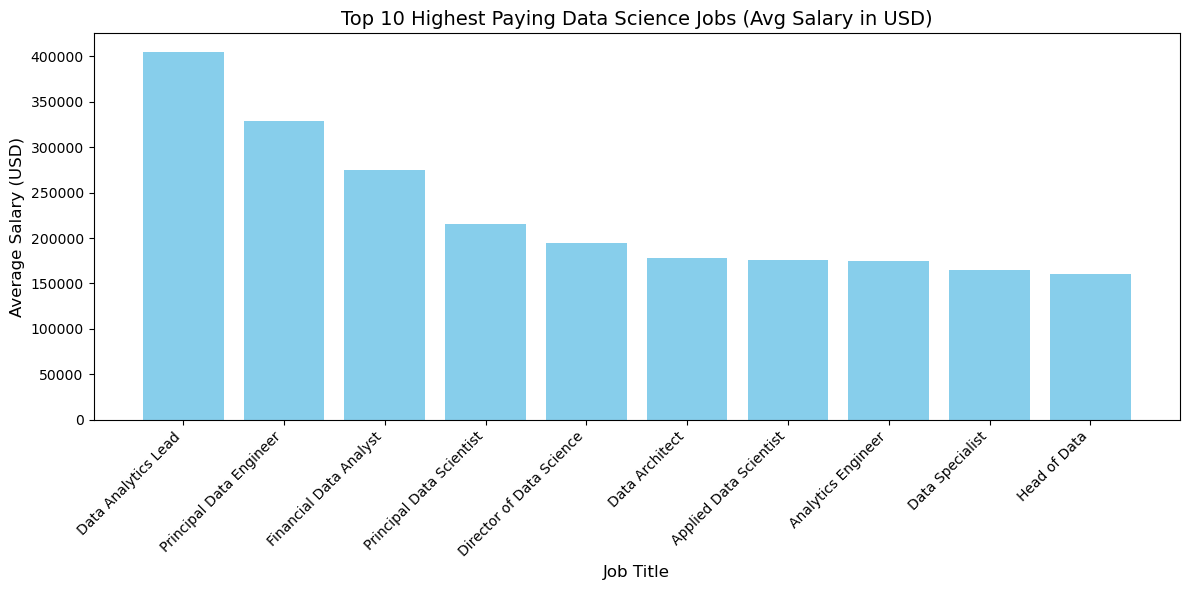

In [17]:
# Group by job title and calculate mean salary
job_title_avg = rita.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(job_title_avg.index, job_title_avg.values, color='skyblue')
plt.title('Top 10 Highest Paying Data Science Jobs (Avg Salary in USD)', fontsize=14)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

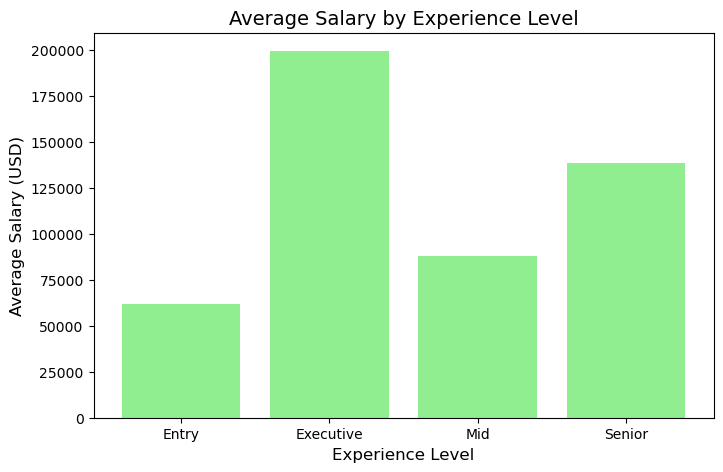

In [18]:
# Group by experience level
exp_level_avg = rita.groupby('experience_level')['salary_in_usd'].mean()
# Map experience codes to full names
exp_map = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'}
exp_level_avg.index = exp_level_avg.index.map(exp_map)
# Plot
plt.figure(figsize=(8, 5))
plt.bar(exp_level_avg.index, exp_level_avg.values, color='lightgreen')
plt.title('Average Salary by Experience Level', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.show()

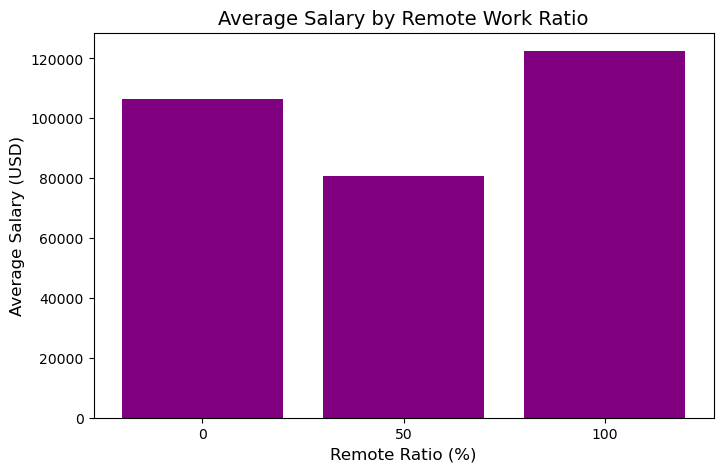

In [25]:
remote_salary = rita.groupby('remote_ratio')['salary_in_usd'].mean()

plt.figure(figsize=(8, 5))
plt.bar(remote_salary.index.astype(str), remote_salary.values, color='purple')
plt.title('Average Salary by Remote Work Ratio', fontsize=14)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.show()

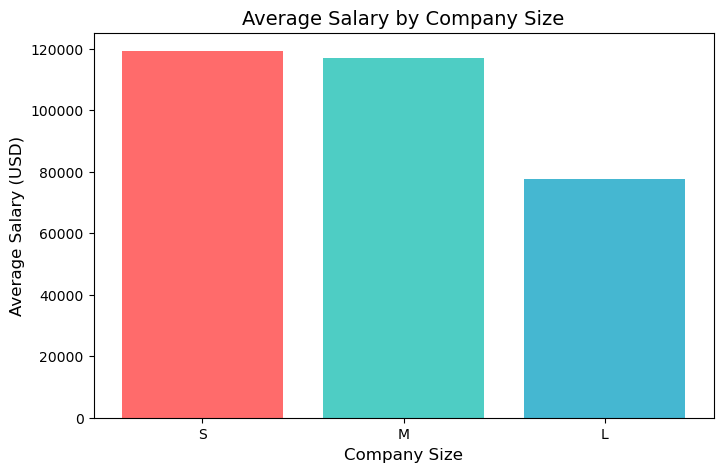

In [26]:
company_size_salary = rita.groupby('company_size')['salary_in_usd'].mean()

plt.figure(figsize=(8, 5))
plt.bar(company_size_salary.index, company_size_salary.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Average Salary by Company Size', fontsize=14)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['S', 'M', 'L'])  # S: Small, M: Medium, L: Large
plt.show()

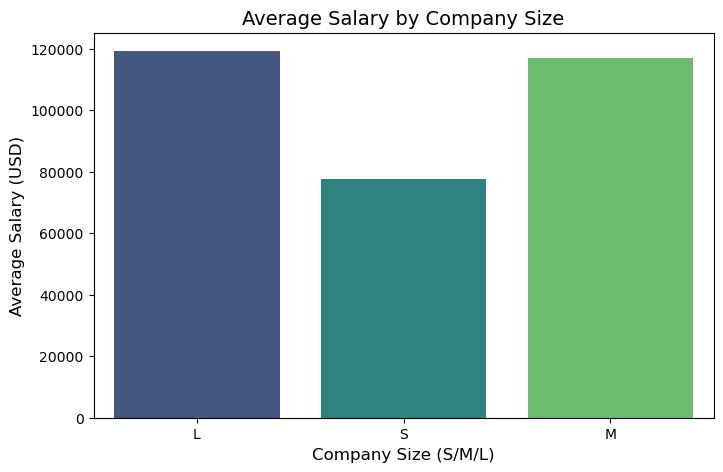

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(data=rita, x='company_size', y='salary_in_usd', hue='company_size', errorbar=None, palette='viridis', legend=False)
plt.title('Average Salary by Company Size', fontsize=14)
plt.xlabel('Company Size (S/M/L)', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.show()

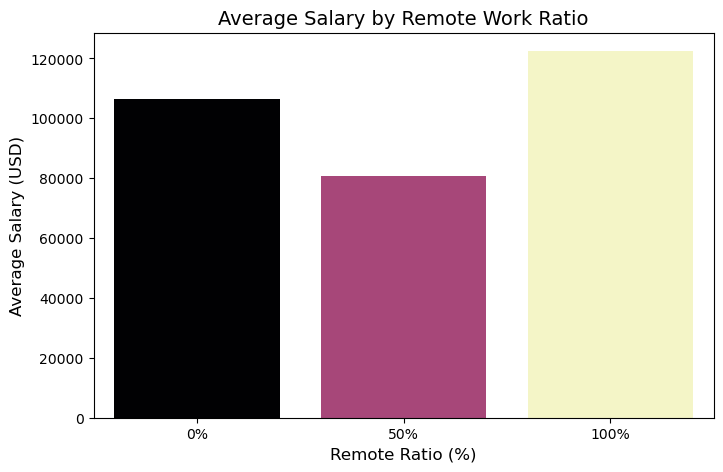

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(data=rita, x='remote_ratio', y='salary_in_usd', hue='remote_ratio', errorbar=None, palette='magma', legend=False)
plt.title('Average Salary by Remote Work Ratio', fontsize=14)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['0%', '50%', '100%'])
plt.show()

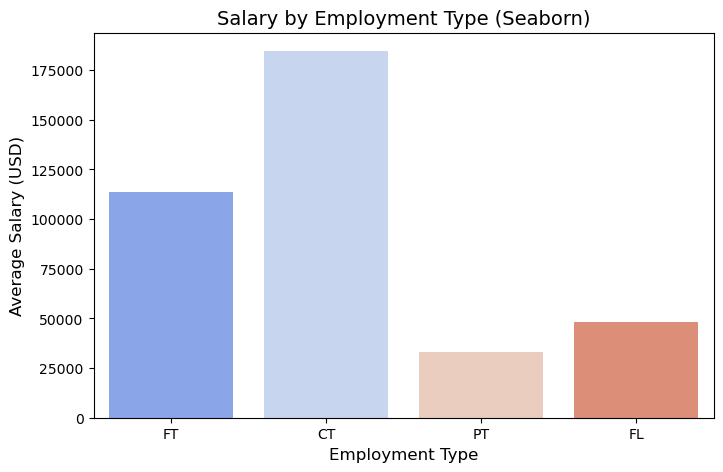

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x='employment_type', y='salary_in_usd', hue='employment_type', data=rita, errorbar=None, palette='coolwarm', legend=False)
plt.title('Salary by Employment Type (Seaborn)', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.show()

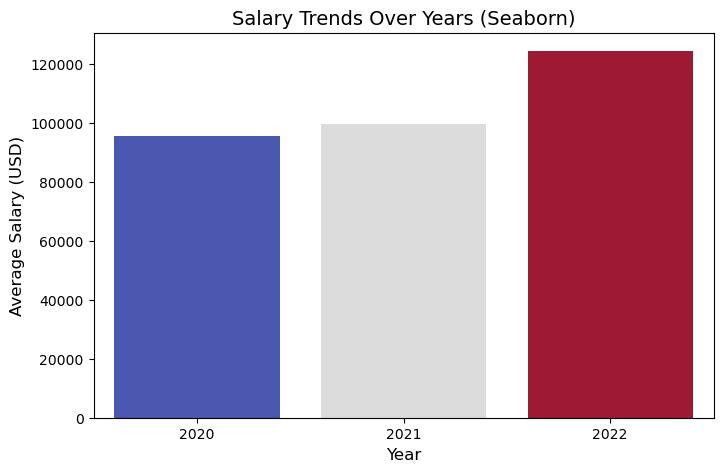

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='work_year', 
    y='salary_in_usd', 
    hue='work_year',  # Assign x to hue
    data=rita, 
    errorbar=None, 
    palette='coolwarm',
    legend=False)
plt.title('Salary Trends Over Years (Seaborn)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.show()